In [13]:
import warnings
warnings.simplefilter('ignore')

import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import auc, roc_curve, classification_report

In [30]:
data= pd.read_csv("C:/Users/samee/OneDrive/Desktop/MScoursework/data science projects/Interview Practice/conversion_data.txt", sep=",")

In [8]:
data.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   country              316200 non-null  object
 1   age                  316200 non-null  int64 
 2   new_user             316200 non-null  int64 
 3   source               316200 non-null  object
 4   total_pages_visited  316200 non-null  int64 
 5   converted            316200 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 14.5+ MB


In [14]:
data.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


<AxesSubplot:>

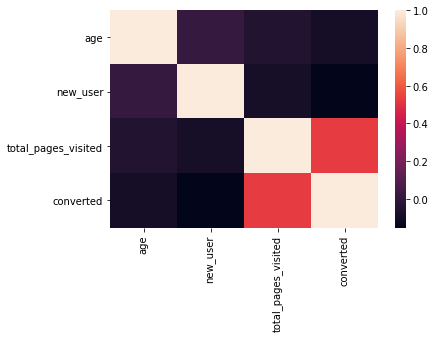

In [11]:
correlation= data.corr()
sns.heatmap(correlation)

In [16]:
for column in data.columns:
    uniques = sorted(data[column].unique())
    print('{0:20s} {1:5d}\t'.format(column, len(uniques)), uniques[:5])

country                  4	 ['China', 'Germany', 'UK', 'US']
age                     60	 [17, 18, 19, 20, 21]
new_user                 2	 [0, 1]
source                   3	 ['Ads', 'Direct', 'Seo']
total_pages_visited     29	 [1, 2, 3, 4, 5]
converted                2	 [0, 1]


In [17]:
#Remove Outliers
data[data['age'] > 90]

,country,age,new_user,source,total_pages_visited,converted
90928,Germany,123,0,Seo,15,1
295581,UK,111,0,Ads,10,1


In [31]:
data=data[data['age']<100]

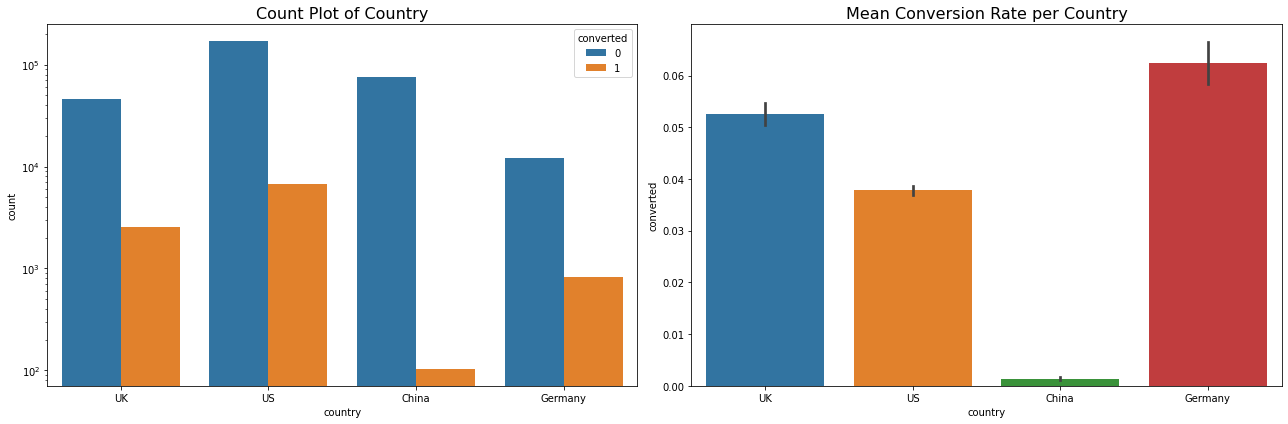

In [21]:
#EDA
data_grouped= data[['country', 'converted']].groupby('country').mean().reset_index()
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.countplot(x='country', hue='converted', data=data, ax=ax[0])
ax[0].set_title('Count Plot of Country', fontsize=16)
ax[0].set_yscale('log')
sns.barplot(x='country', y='converted', data=data, ax=ax[1]);
ax[1].set_title('Mean Conversion Rate per Country', fontsize=16)
plt.tight_layout()
plt.show()

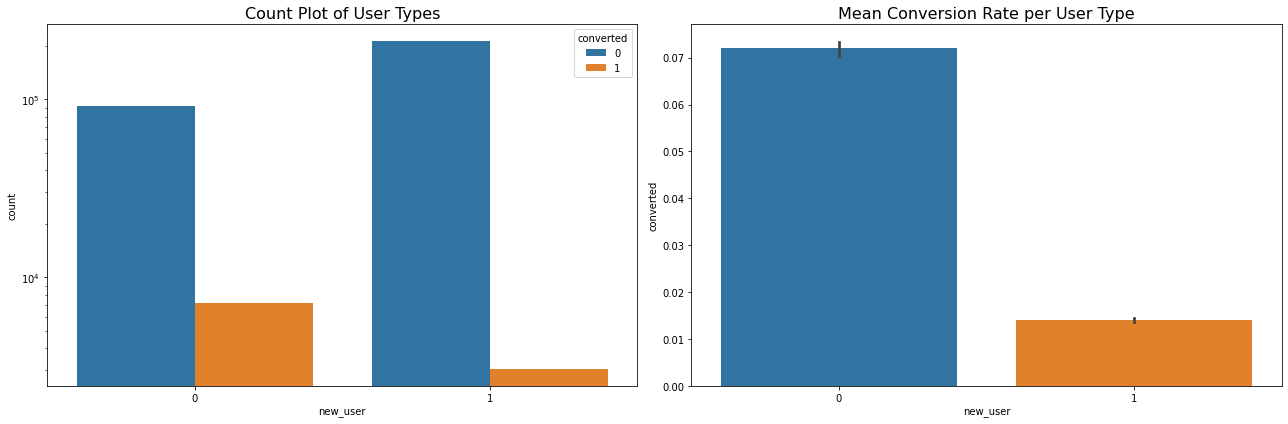

In [22]:
#viz of different user types 
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.countplot(x='new_user', hue='converted', data=data, ax=ax[0])
ax[0].set_title('Count Plot of User Types', fontsize=16)
ax[0].set_yscale('log')
sns.barplot(x='new_user', y='converted', data=data, ax=ax[1]);
ax[1].set_title('Mean Conversion Rate per User Type', fontsize=16)
plt.tight_layout()
plt.show()

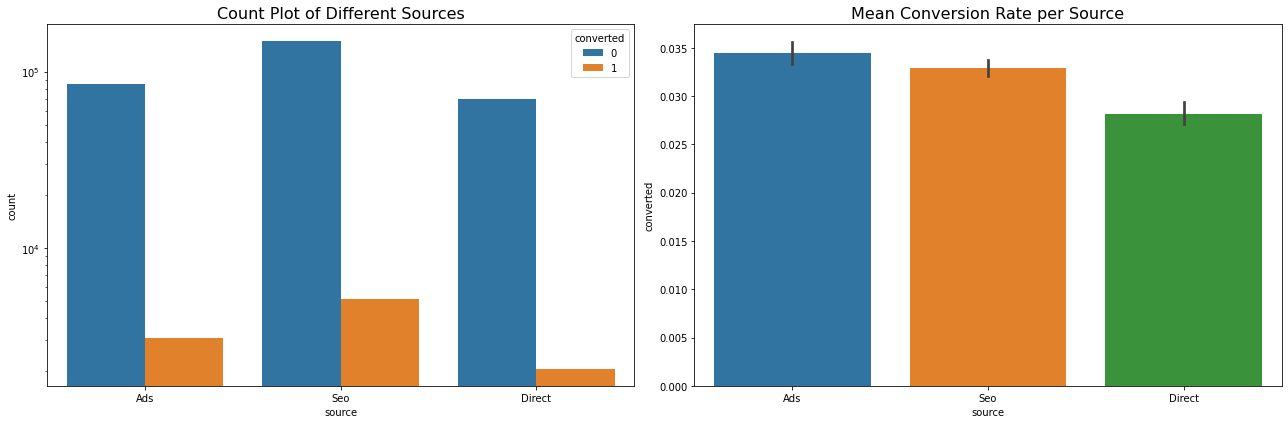

In [23]:
# Visualization of different sources
grouped = data[['source', 'converted']].groupby('source').mean().reset_index()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.countplot(x='source', hue='converted', data=data, ax=ax[0])
ax[0].set_title('Count Plot of Different Sources', fontsize=16)
ax[0].set_yscale('log')
sns.barplot(x='source', y='converted', data=data, ax=ax[1]);
ax[1].set_title('Mean Conversion Rate per Source', fontsize=16)
plt.tight_layout()
plt.show()

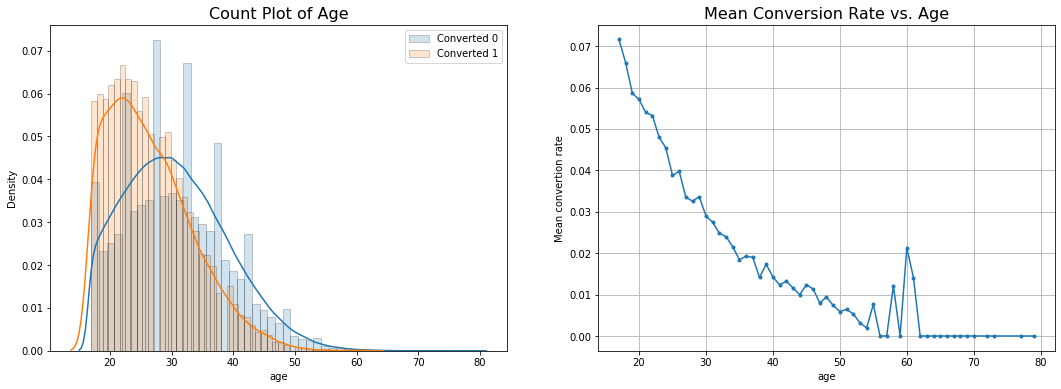

In [24]:
# Visualization of different ages 
grouped = data[['age', 'converted']].groupby('age').mean().reset_index()
hist_kws={'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.2}

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.distplot(data[data['converted'] == 0]['age'], label='Converted 0', 
             ax=ax[0], hist_kws=hist_kws)
sns.distplot(data[data['converted'] == 1]['age'], label='Converted 1', 
             ax=ax[0], hist_kws=hist_kws)
ax[0].set_title('Count Plot of Age', fontsize=16)
ax[0].legend()
ax[1].plot(grouped['age'], grouped['converted'], '.-')
ax[1].set_title('Mean Conversion Rate vs. Age', fontsize=16)
ax[1].set_xlabel('age')
ax[1].set_ylabel('Mean convertion rate')
ax[1].grid(True)
plt.show()

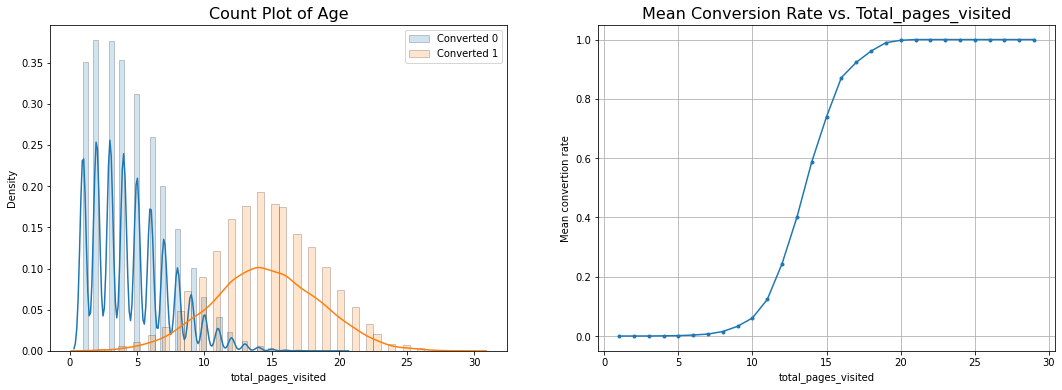

In [25]:
# Visualization of different page_visits
grouped = data[['total_pages_visited', 'converted']].groupby('total_pages_visited').mean().reset_index()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.distplot(data[data['converted'] == 0]['total_pages_visited'], 
             label='Converted 0', ax=ax[0], hist_kws=hist_kws)
sns.distplot(data[data['converted'] == 1]['total_pages_visited'], 
             label='Converted 1', ax=ax[0], hist_kws=hist_kws)
ax[0].set_title('Count Plot of Age', fontsize=16)
ax[0].legend()
ax[1].plot(grouped['total_pages_visited'], grouped['converted'], '.-')
ax[1].set_title('Mean Conversion Rate vs. Total_pages_visited', fontsize=16)
ax[1].set_xlabel('total_pages_visited')
ax[1].set_ylabel('Mean convertion rate')
ax[1].grid(True)
plt.show()

In [32]:
## plot scatter graph to bin the age
bins =[15,19,25,29,35,39,45,49,55,59,65]
names = ['15–19','20–25','26–29','30–35','36–39','40–45','46–49','50–55','56–59','60–61']
data['age_bin']=pd.cut(data['age'],bins,labels=names).astype(object)
grouped = data.groupby(['age_bin'])['converted'].sum()

In [35]:
data.head()

,country,age,new_user,source,total_pages_visited,converted,age_bin
0,UK,25,1,Ads,1,0,20–25
1,US,23,1,Seo,5,0,20–25
2,US,28,1,Seo,4,0,26–29
3,China,39,1,Seo,5,0,36–39
4,US,30,1,Seo,6,0,30–35


In [37]:
#OHE for categorical features 
catdata=pd.get_dummies(data[['age_bin','country','source']])

In [42]:
alldata = catdata.join(data[['new_user','total_pages_visited','converted']])
x = alldata.drop(columns='converted')
y = alldata['converted']


In [44]:
#model selection 
from sklearn.model_selection import train_test_split, KFold, cross_validate, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

base_models = [("DT_model", DecisionTreeClassifier(random_state=42)),
 ("RF_model", RandomForestClassifier(random_state=42,n_jobs=-1)),
 ("LR_model", LogisticRegression(random_state=42,n_jobs=-1))]

kfolds = 4 # 4 = 75% train, 25% validation
split = KFold(n_splits=kfolds, shuffle=True, random_state=42)


In [49]:
for name, model in base_models:
# get cross validation score for each model:
 cv_results = cross_val_score(model, 
 x, y, 
 cv=split,
 scoring="accuracy",
 n_jobs=-1)
 # output:
 min_score = round(min(cv_results), 4)
 max_score = round(max(cv_results), 4)
 mean_score = round(np.mean(cv_results), 4)
 std_dev = round(np.std(cv_results), 4)
 print(f"{name} cross validation accuarcy score: {mean_score} +/- {std_dev} (std) min: {min_score}, max: {max_score}")

DT_model cross validation accuarcy score: 0.9853 +/- 0.0003 (std) min: 0.985, max: 0.9857
RF_model cross validation accuarcy score: 0.9854 +/- 0.0003 (std) min: 0.9851, max: 0.9858
LR_model cross validation accuarcy score: 0.9861 +/- 0.0003 (std) min: 0.9856, max: 0.9866


From the preliminary run, it is found that Logistic Regression shows the best performance out of the selected models.

In [50]:
#hyperparameter tuning 
from sklearn.model_selection import GridSearchCV

clf = LogisticRegression()

param_grid = {'C' : np.logspace(-4, 4, 20),
 }

gs = GridSearchCV(clf, param_grid = param_grid, cv = split, verbose=True, n_jobs=-1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 10)
gs.fit(x_train,y_train)

Fitting 4 folds for each of 20 candidates, totalling 80 fits


GridSearchCV(cv=KFold(n_splits=4, random_state=42, shuffle=True),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04])},
             verbose=True)

In [51]:
# print best parameter after tuning 
print(gs.best_params_) 

{'C': 206.913808111479}


In [53]:
y_pred_acc = gs.predict(x_test)
print('Accuracy Score :' + str(accuracy_score(y_test,y_pred_acc)))
print('F1 Score :' + str(f1_score(y_test,y_pred_acc)))


Accuracy Score :0.9858633776091081
F1 Score :0.7598065556152606


Text(0.5, 1.0, 'Feature Importance')

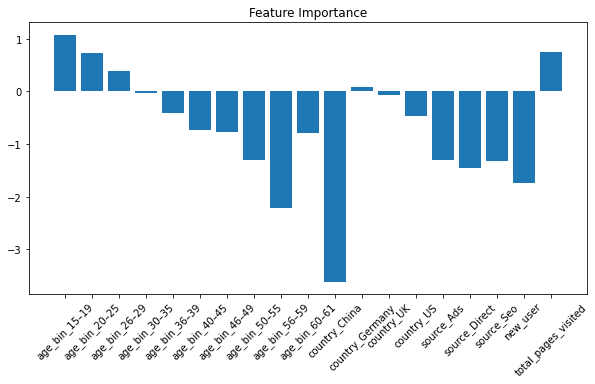

In [55]:
#feature importance 
lr = LogisticRegression(random_state=42,n_jobs=-1)
lr.fit(x_train,y_train)
plt.figure(figsize=(10,5))
plt.bar(x.columns,lr.coef_[0])
plt.xticks(rotation=45)
plt.title('Feature Importance')